**Op-Ed Article: Covid's Next Problem** <br>
*Jake Schneider & Peter McKelvey* <br>
May 2020

---

**Load Libraries**

In [21]:
#Import libraries
import sys
import pandas as pd
from datetime import date, datetime, time, timedelta
import pendulum
import json
import requests
import numpy as np
import math

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks', context='talk')

from matplotlib.offsetbox import AnchoredText
from sklearn import linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm
#import fbprophet

import statistics 
from statistics import mode 

from collections import OrderedDict 

import warnings
import itertools

from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF
from PIL import Image

----

**Load Data**

In [22]:
# Load Data from BLS Initial and Continued Claims
# Data available from: https://oui.doleta.gov/unemploy/claims.asp

UI_df = pd.read_csv('../2_Inputs/UI Data/UI_Claims/r539cy.csv', parse_dates=['Date'])

In [23]:
# View Data

UI_df.head()

,Date,Initial Claims N.S.A,Initial Claims S.F.,Initial Claims S.A.,Initial Claims S.A. 4-Week,Continued Claims N.S.A,Continued Claims S.F.,Continued Claims S.A.,Continued Claims S.A. 4-Week,I.U.R N.S.A,I.U.R S.A.,Covered Employment
0,1967-01-07,"346,000",166.5,"208,000",0,"1,594,000",140.6,"1,134,000",0,NaN,NaN,NaN
1,1967-01-14,"334,000",161.5,"207,000",0,"1,563,000",139.7,"1,119,000",0,NaN,NaN,NaN
2,1967-01-21,"277,000",127.8,"217,000",0,"1,551,000",138.6,"1,119,000",0,NaN,NaN,NaN
3,1967-01-28,"252,000",123.8,"204,000","209,000","1,533,000",139.0,"1,103,000","1,118,750",NaN,NaN,NaN
4,1967-02-04,"274,000",127.1,"216,000","211,000","1,534,000",135.6,"1,131,000","1,118,000",NaN,NaN,NaN


In [32]:
# Search for NaNs in data

pd.isna(UI_df['Initial Claims S.A.'])

0       False
1       False
2       False
3       False
4       False
        ...  
2826     True
2827     True
2828     True
2829     True
2830     True
Name: Initial Claims S.A., Length: 2831, dtype: bool

In [40]:
# Create Function for Plotting Figures

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Values', save_loc='../3_Outputs/chart_rename.jpg', dpi=300):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig(save_loc, dpi=300, bbox_inches='tight')
    sns.despine()
    plt.show()

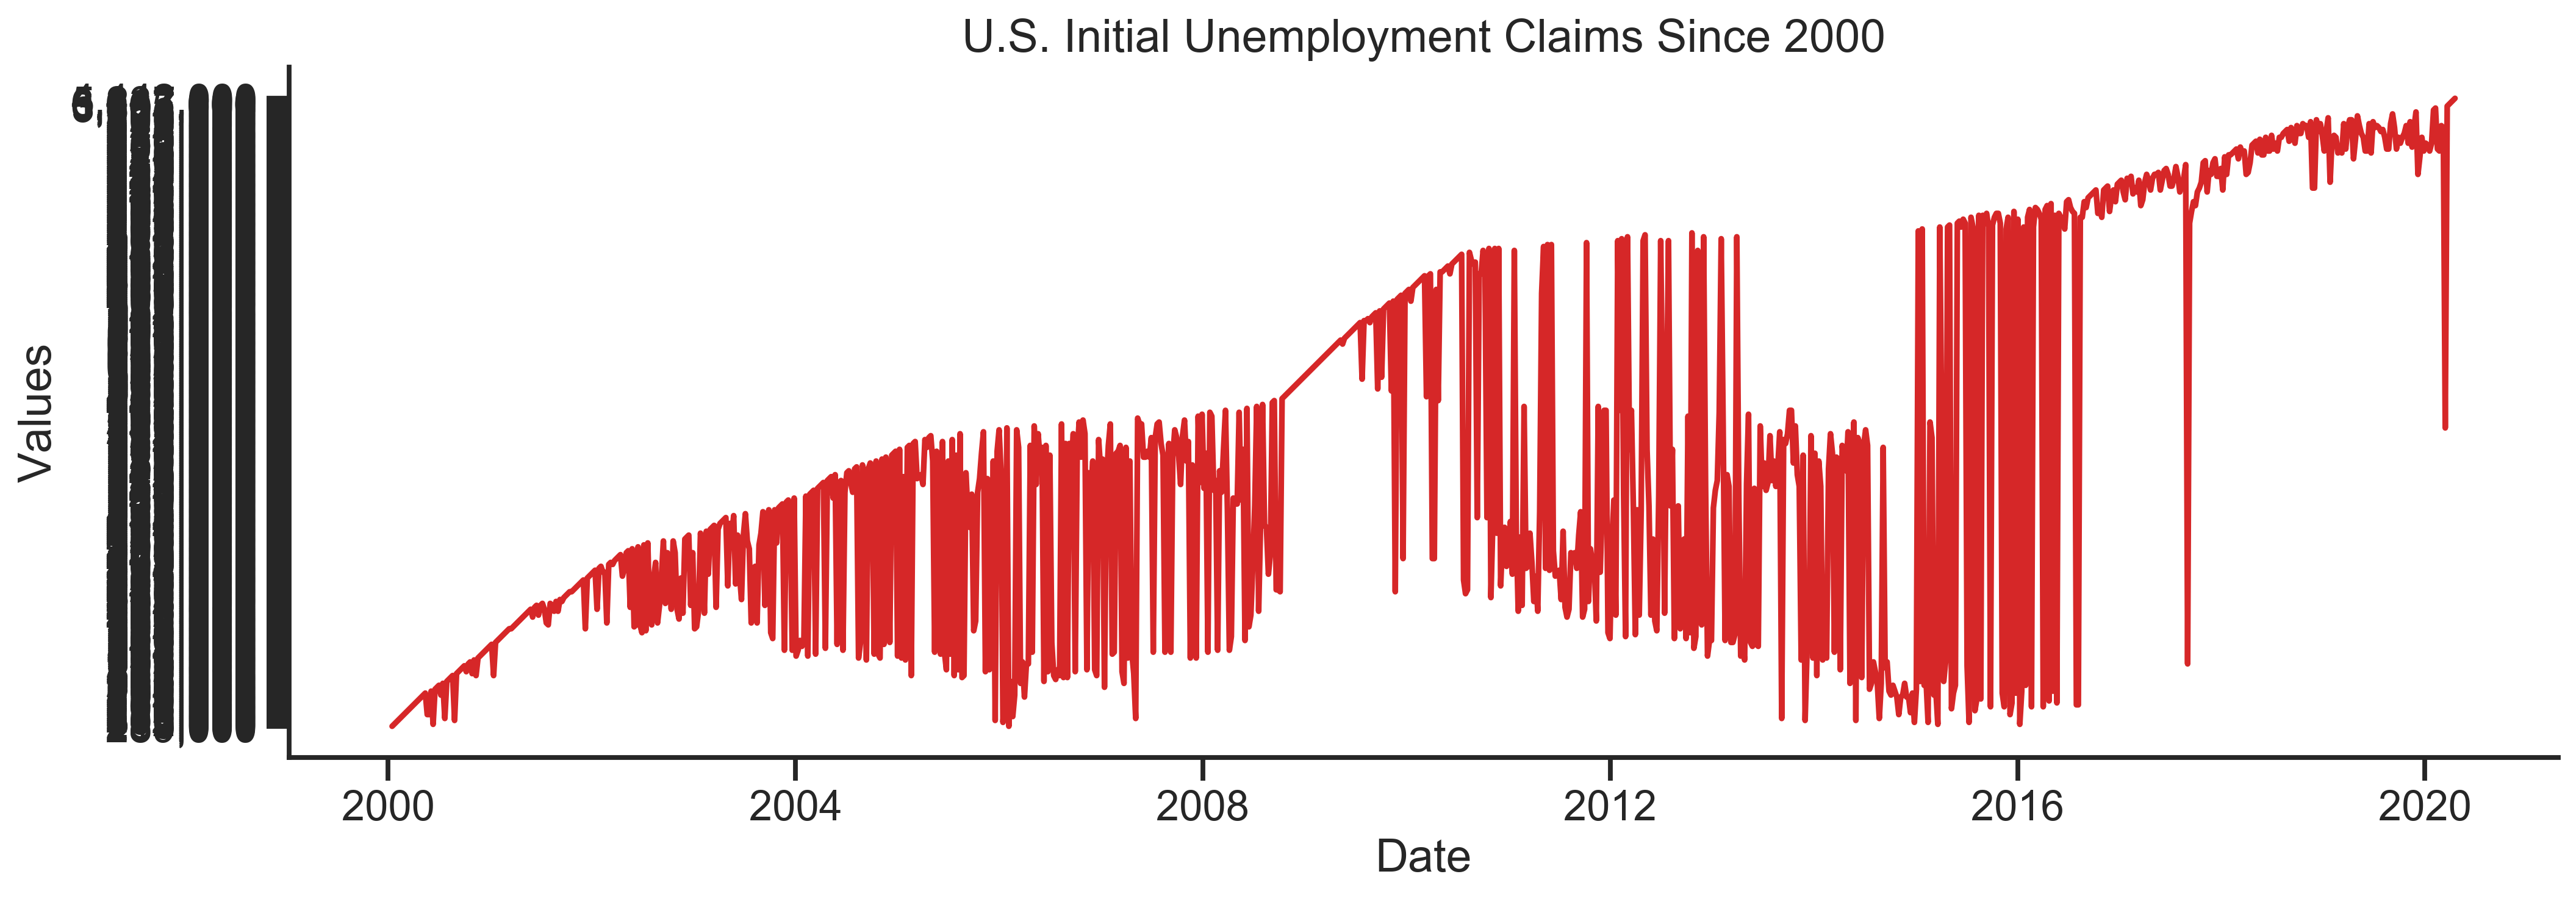

In [45]:
plot_df(UI_df.sort_values(['Date']), x=UI_df['Date'][1723:2781], y=UI_df['Initial Claims S.A.'][1723:2781], title='U.S. Initial Unemployment Claims Since 2000', save_loc='../3_Outputs/Initial Claims.jpg')   

In [36]:
UI_df = UI_df

In [38]:
UI_df.head()

,Date,Initial Claims N.S.A,Initial Claims S.F.,Initial Claims S.A.,Initial Claims S.A. 4-Week,Continued Claims N.S.A,Continued Claims S.F.,Continued Claims S.A.,Continued Claims S.A. 4-Week,I.U.R N.S.A,I.U.R S.A.,Covered Employment
0,1967-01-07,"346,000",166.5,"208,000",0,"1,594,000",140.6,"1,134,000",0,NaN,NaN,NaN
1,1967-01-14,"334,000",161.5,"207,000",0,"1,563,000",139.7,"1,119,000",0,NaN,NaN,NaN
2,1967-01-21,"277,000",127.8,"217,000",0,"1,551,000",138.6,"1,119,000",0,NaN,NaN,NaN
3,1967-01-28,"252,000",123.8,"204,000","209,000","1,533,000",139.0,"1,103,000","1,118,750",NaN,NaN,NaN
4,1967-02-04,"274,000",127.1,"216,000","211,000","1,534,000",135.6,"1,131,000","1,118,000",NaN,NaN,NaN


In [39]:
UI_df['Initial Claims S.A.'][1723:2781].plot(legend=True,figsize=(10,4))

TypeError: no numeric data to plot